In [46]:
import os, random
# suppress messages overload from Tensorflow 
# (@see: https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import tensorflow as tf
print(f'Using Tensorflow: {tf.__version__}')

import kr_helper_funcs as kru

# initialize random no generators for re-producable results
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

Using Tensorflow: 2.5.0


In [47]:
# load the MNIST datasets
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# split training data into train & cross-val datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=SEED)
print(f'X_train.shape: {X_train.shape} - y_train.shape: {y_train.shape} ' +
      f'X_val.shape: {X_val.shape} - y_val.shape: {y_val.shape} ' +
      f'- X_test.shape: {X_test.shape} - y_test.shape: {y_test.shape}') 

X_train.shape: (48000, 28, 28) - y_train.shape: (48000,) X_val.shape: (12000, 28, 28) - y_val.shape: (12000,) - X_test.shape: (10000, 28, 28) - y_test.shape: (10000,)


In [48]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [49]:
# explore the data
rand_indexes = np.random.randint(0, len(X_train), 20)
rand_indexes

array([15795,   860, 38158, 44732, 11284,  6265, 16850, 37194, 21962,
       47191, 44131, 16023, 41090,  1685,   769,  2433,  5311, 37819,
       39188, 17568])

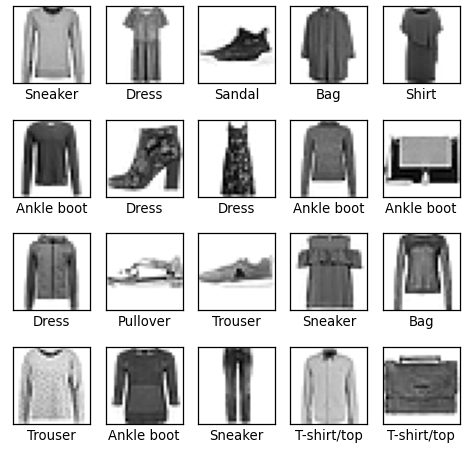

In [50]:
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[rand_indexes[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    
plt.show()
plt.close()

In [51]:
# normalize X's 
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

In [53]:
hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5866 - acc: 0.7893 - val_loss: 0.4263 - val_acc: 0.8419
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4277 - acc: 0.8439 - val_loss: 0.3807 - val_acc: 0.8609
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3945 - acc: 0.8558 - val_loss: 0.3575 - val_acc: 0.8677
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3694 - acc: 0.8637 - val_loss: 0.3495 - val_acc: 0.8721
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3533 - acc: 0.8678 - val_loss: 0.3360 - val_acc: 0.8753
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3393 - acc: 0.8734 - val_loss: 0.3314 - val_acc: 0.8788
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3310 - acc: 0.8772 - val_loss: 0.3231 - val_acc: 0.8838
Epoch 8/20
1500/1500 [==============================] - 7s 4ms

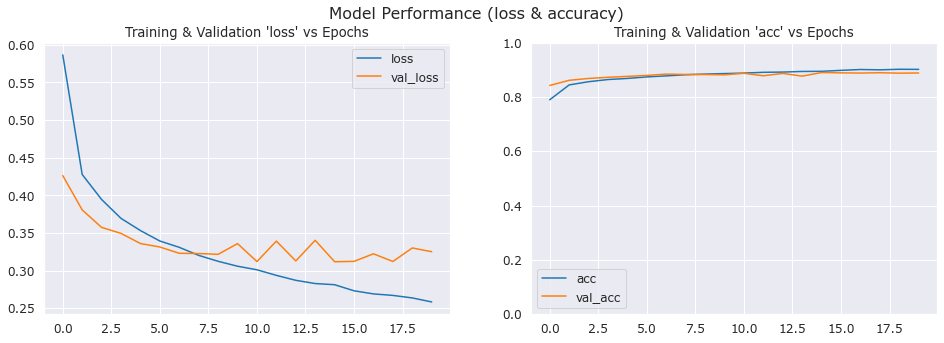

In [54]:
import kr_helper_funcs as kru

kru.show_plots(hist.history, metric='acc', plot_title='Model Performance (loss & accuracy)')

In [55]:
# evaluate model preformance on test set
loss, acc = model.evaluate(X_train, y_train)
print(f'Training set  -> loss: {loss:.4f} - acc: {acc:.4f}')
loss, acc = model.evaluate(X_val, y_val)
print(f'Cross-val set -> loss: {loss:.4f} - acc: {acc:.4f}')
loss, acc = model.evaluate(X_test, y_test)
print(f'Test set      -> loss: {loss:.4f} - acc: {acc:.4f}')

1500/1500 [==============================] - 4s 3ms/step - loss: 0.2165 - acc: 0.9171
Training set  -> loss: 0.2165 - acc: 0.9171
375/375 [==============================] - 1s 3ms/step - loss: 0.3251 - acc: 0.8878
Cross-val set -> loss: 0.3251 - acc: 0.8878
313/313 [==============================] - 1s 4ms/step - loss: 0.3479 - acc: 0.8827
Test set      -> loss: 0.3479 - acc: 0.8827


In [56]:
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)
y_pred[:20], y_test[:20]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0],
       dtype=int64),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0],
       dtype=uint8))

In [57]:
print(f'{(y_pred != y_test).sum()} out of {len(y_test)} incorrect predictions!')

1173 out of 10000 incorrect predictions!
